In [1]:
import sys
import os
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.gridspec import GridSpec

from pathlib import Path

In [2]:
# From https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html

def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    #ax.spines[:].set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return ax, im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

In [3]:
def to_heatmap(mean: pd.DataFrame, vmax = 0.1025, vmin= 0.1007, split_over_cols = 'max_depth'): # 
    """
    3D indexed values to multiple 2D matrices.
    """
    ncols = len(mean.index.get_level_values(split_over_cols).unique())

    fig, axes = plt.subplots(nrows = 1, ncols= ncols, figsize = (4*ncols,3))
    title_values = mean.index.get_level_values(split_over_cols).unique()
    for i, key in enumerate(title_values):
        df = mean.iloc[mean.index.get_loc_level(key, split_over_cols)[0]]
        df.index = df.index.droplevel(split_over_cols)
        df = df.unstack(1)
        y_labels = df.index.get_level_values(0).values
        x_labels = df.columns.get_level_values(0).values
        ax, im, cbar = heatmap(data = df.values, ax = axes[i], row_labels = y_labels, vmax = vmax, vmin = vmin, cmap = 'YlGn_r',col_labels = x_labels, cbarlabel="Brier Score")
    print(f'y = {df.index.name}')
    print(f'x = {df.columns.name}')
    print(f'columns = {title_values}')
    return fig, axes

y = max_depth
x = min_samples_split
columns = Int64Index([25, 35, 100], dtype='int64', name='max_features')


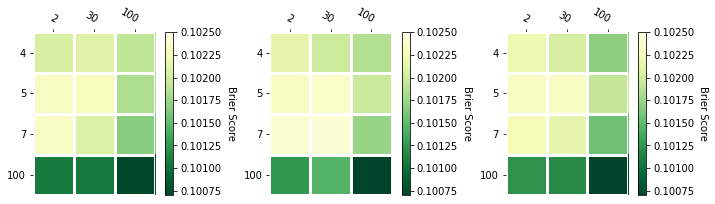

In [6]:
allfolds31 = pd.read_hdf(Path('/scistor/ivm/jsn295/hyperparams') / 'bs_31_-15_0.666.pre1981.h5')
mean31 = allfolds31.mean(axis = 0)
to_heatmap(mean31, split_over_cols= 'max_features')
plt.show()

y = max_depth
x = min_samples_split
columns = Int64Index([25, 35, 100], dtype='int64', name='max_features')


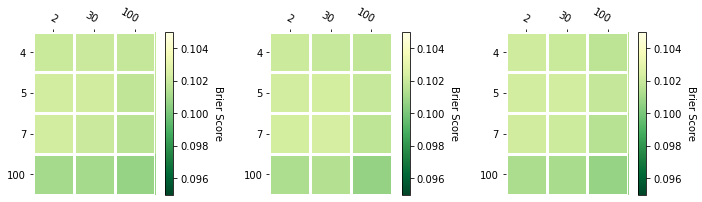

In [13]:
to_heatmap(mean31, split_over_cols= 'max_features',vmax = 0.105, vmin = 0.095)
plt.show()

y = max_depth
x = min_samples_split
columns = Int64Index([25, 35, 100], dtype='int64', name='max_features')


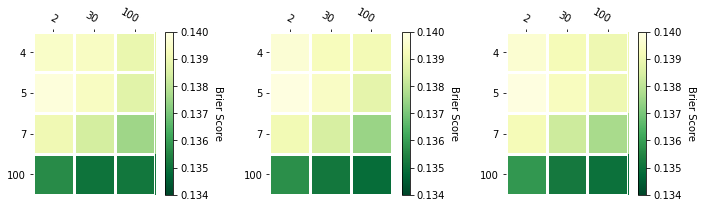

In [16]:
allfolds15 = pd.read_hdf(Path('/scistor/ivm/jsn295/hyperparams') / 'bs_15_-7_0.666.pre1981.h5')
mean15 = allfolds15.mean(axis = 0)
to_heatmap(mean15, split_over_cols= 'max_features', vmin = 0.134, vmax = 0.140)
plt.show()

y = max_depth
x = min_samples_split
columns = Int64Index([25, 35, 100], dtype='int64', name='max_features')


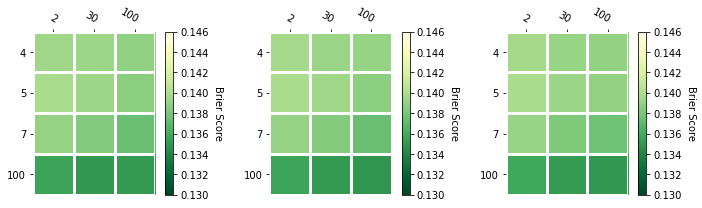

In [20]:
to_heatmap(mean15, split_over_cols= 'max_features', vmin = 0.130, vmax = 0.14)
plt.show()

### Less predictable regimes
In the subseasonal regimes, there is little value to be extracted. We see that the lower scores tend to occur at 100 max_depth so potentially very deep. But then it will not beat the benchmark. Perhaps it tries to be as close to the benchmark as possible and can do that averaging extremely random overfitting individual trees.

Scaling the score display to the range that occurs when predicting the same data but with slightly different input and training (i.e. another fold) we see that differences are marginal compared to that variability.

y = max_depth
x = min_samples_split
columns = Int64Index([25, 35, 100], dtype='int64', name='max_features')


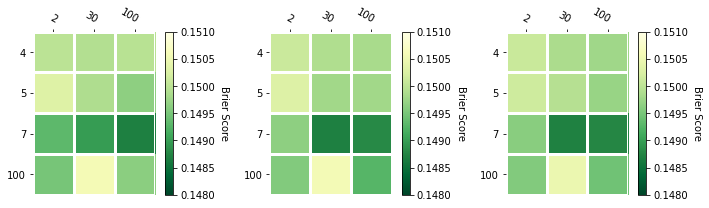

In [10]:
allfolds7 = pd.read_hdf(Path('/scistor/ivm/jsn295/hyperparams') / 'bs_7_-5_0.666.pre1981.h5')
mean7 = allfolds7.mean(axis = 0)
to_heatmap(mean7, split_over_cols= 'max_features', vmin = 0.148, vmax = 0.151)
plt.show()

y = max_depth
x = min_samples_split
columns = Int64Index([25, 35, 100], dtype='int64', name='max_features')


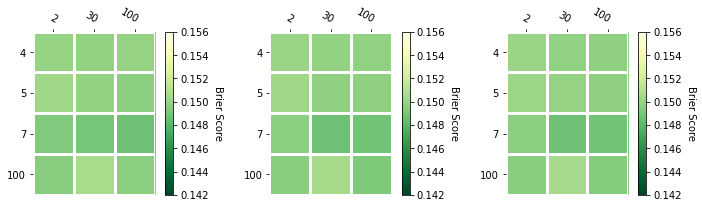

In [12]:
to_heatmap(mean7, split_over_cols= 'max_features', vmin = 0.142, vmax = 0.156)
plt.show()

y = max_depth
x = min_samples_split
columns = Int64Index([25, 35, 100], dtype='int64', name='max_features')


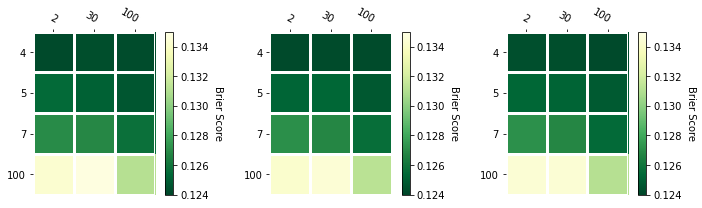

In [23]:
allfolds70 = pd.read_hdf(Path('/scistor/ivm/jsn295/hyperparams') / 'bs_7_0_0.666.pre1981.h5')
mean70 = allfolds70.mean(axis = 0)
to_heatmap(mean70, split_over_cols= 'max_features', vmin = 0.124, vmax = 0.135)
plt.show()

y = max_depth
x = min_samples_split
columns = Int64Index([25, 35, 100], dtype='int64', name='max_features')


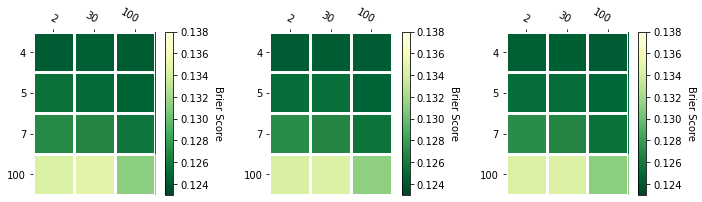

In [27]:
to_heatmap(mean70, split_over_cols= 'max_features', vmin = 0.123, vmax = 0.138)
plt.show()

### More predictable regimes
Here we see a clearer aversion of overfitting. Something can be learned. At timeagg = 7 and separation = -5 the sensitivity is to max_depth and to min_samples_split. Preferring a moderate values (at least not depth 100 and min_samples_split = 2). 
Especially in the last case the differences between the hyperparameter settings become larger than the differences between folds. The patterns stays similar after rescaling.